# MVA - Multivariate Analysis with Prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")

In [ ]:
data.shape

(38014, 18)

In [ ]:
data

DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
0      01/11/2011 00:00            None            0          1          44   
1      01/11/2011 00:30            None            0          1          44   
2      01/11/2011 01:00            None            0          1          44   
3      01/11/2011 01:30            None            0          1          44   
4      01/11/2011 02:00            None            0          1          44   
...                 ...             ...          ...        ...         ...   
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month  Year  PeriodOfDay ForecastWindProduction SystemLoadEA  \
0        1     11  2011            0                 315.31      3388.77   
1        1     11  2011            1                 321.80      3196.66   
2        1     11  2011            2                 328.57      3060.71   
3        1     11  2011            3                 335.60      2945.56   
4        1     11  2011            4                 342.90      2849.34   
...    ...    ...   ...          ...                    ...          ...   
38009   31     12  2013           43                1179.14      3932.22   
38010   31     12  2013           44                1152.01      3821.44   
38011   31     12  2013           45                1123.67      3724.21   
38012   31     12  2013           46                1094.24      3638.16   
38013   31     12  2013           47                 1064.0      3624.25   

       SMPEA ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction  \
0      49.26           6.00         9.30       600.71               356.00   
1      49.26           6.00        11.10       605.42               317.00   
2      49.10           5.00        11.10       589.97               311.00   
3      48.04           6.00         9.30       585.94               313.00   
4      33.75           6.00        11.10       571.52               346.00   
...      ...            ...          ...          ...                  ...   
38009  34.51           6.00        22.20       285.31                812.0   
38010  33.83           5.00        24.10       278.31                852.0   
38011  31.75           4.00        20.40       280.91                962.0   
38012  33.83           5.00        14.80       302.46                950.0   
38013  33.83           5.00        16.70       308.01               1020.0   

      SystemLoadEP2 SMPEP2  
0           3159.60  54.32  
1           2973.01  54.23  
2           2834.00  54.23  
3           2725.99  53.47  
4           2655.64  39.87  
...             ...    ...  
38009       3692.95  42.45  
38010        3571.0  33.83  
38011       3460.29  31.75  
38012       3563.99   50.6  
38013       3517.08   34.9  

[38014 rows x 18 columns]

DateTime: Date and time of the record   
Holiday: contains the name of the holiday if the day is a national holiday   
HolidayFlag: contains 1 if it’s a bank holiday otherwise 0   
DayOfWeek: contains values between 0-6 where 0 is Monday   
WeekOfYear: week of the year    
Day: Day of the date   
Month: Month of the date   
Year: Year of the date   
PeriodOfDay: half-hour period of the day   
ForcastWindProduction: forecasted wind production   
SystemLoadEA forecasted national load   
SMPEA: forecasted price   
ORKTemperature: actual temperature measured   
ORKWindspeed: actual windspeed measured   
CO2Intensity: actual C02 intensity for the electricity produced   
ActualWindProduction: actual wind energy production   
SystemLoadEP2: actual national system load   
SMPEP2: the actual price of the electricity consumed (labels or values to be predicted)   

In [ ]:
data.describe()

HolidayFlag     DayOfWeek    WeekOfYear           Day         Month  \
count  38014.000000  38014.000000  38014.000000  38014.000000  38014.000000   
mean       0.040406      2.997317     28.124586     15.739412      6.904246   
std        0.196912      1.999959     15.587575      8.804247      3.573696   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        0.000000      1.000000     15.000000      8.000000      4.000000   
50%        0.000000      3.000000     29.000000     16.000000      7.000000   
75%        0.000000      5.000000     43.000000     23.000000     10.000000   
max        1.000000      6.000000     52.000000     31.000000     12.000000   

               Year   PeriodOfDay  
count  38014.000000  38014.000000  
mean    2012.383859     23.501105  
std        0.624956     13.853108  
min     2011.000000      0.000000  
25%     2012.000000     12.000000  
50%     2012.000000     24.000000  
75%     2013.000000     35.750000  
max     2013.000000     47.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [ ]:
# many fields are numeric but they are load as object. Convert them to number.
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [ ]:
data.describe()

HolidayFlag     DayOfWeek    WeekOfYear           Day         Month  \
count  38014.000000  38014.000000  38014.000000  38014.000000  38014.000000   
mean       0.040406      2.997317     28.124586     15.739412      6.904246   
std        0.196912      1.999959     15.587575      8.804247      3.573696   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        0.000000      1.000000     15.000000      8.000000      4.000000   
50%        0.000000      3.000000     29.000000     16.000000      7.000000   
75%        0.000000      5.000000     43.000000     23.000000     10.000000   
max        1.000000      6.000000     52.000000     31.000000     12.000000   

               Year   PeriodOfDay  ForecastWindProduction  SystemLoadEA  \
count  38014.000000  38014.000000            38009.000000  38012.000000   
mean    2012.383859     23.501105              544.261451   4020.085019   
std        0.624956     13.853108              414.364629    860.476866   
min     2011.000000      0.000000                0.680000   2183.940000   
25%     2012.000000     12.000000              189.670000   3281.207500   
50%     2012.000000     24.000000              441.980000   4103.600000   
75%     2013.000000     35.750000              839.460000   4638.532500   
max     2013.000000     47.000000             1680.000000   6492.910000   

              SMPEA  ORKTemperature  ORKWindspeed  CO2Intensity  \
count  38012.000000    37719.000000  37715.000000  38007.000000   
mean      62.720388        9.626369     19.211770    479.373040   
std       32.252334        4.439934      9.571311     85.354706   
min        0.000000       -4.000000      0.000000      0.000000   
25%       45.530000        6.000000     13.000000    421.105000   
50%       55.230000        9.000000     18.500000    480.310000   
75%       70.320000       13.000000     24.100000    537.520000   
max      587.580000       25.000000     75.900000    842.880000   

       ActualWindProduction  SystemLoadEP2        SMPEP2  
count          38009.000000   38012.000000  38012.000000  
mean             520.762819    3785.973841     64.136823  
std              378.282975     843.269455     35.415036  
min                1.000000    1809.960000    -47.740000  
25%              199.000000    3058.277500     45.780000  
50%              445.000000    3865.745000     55.545000  
75%              793.000000    4427.590000     72.110000  
max             1769.000000    6309.750000   1000.000000

In [ ]:
data.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [ ]:
data = data.dropna()

<ipython-input-15-921ca9d1e659>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = np.round(data.corr(method='pearson'),2)


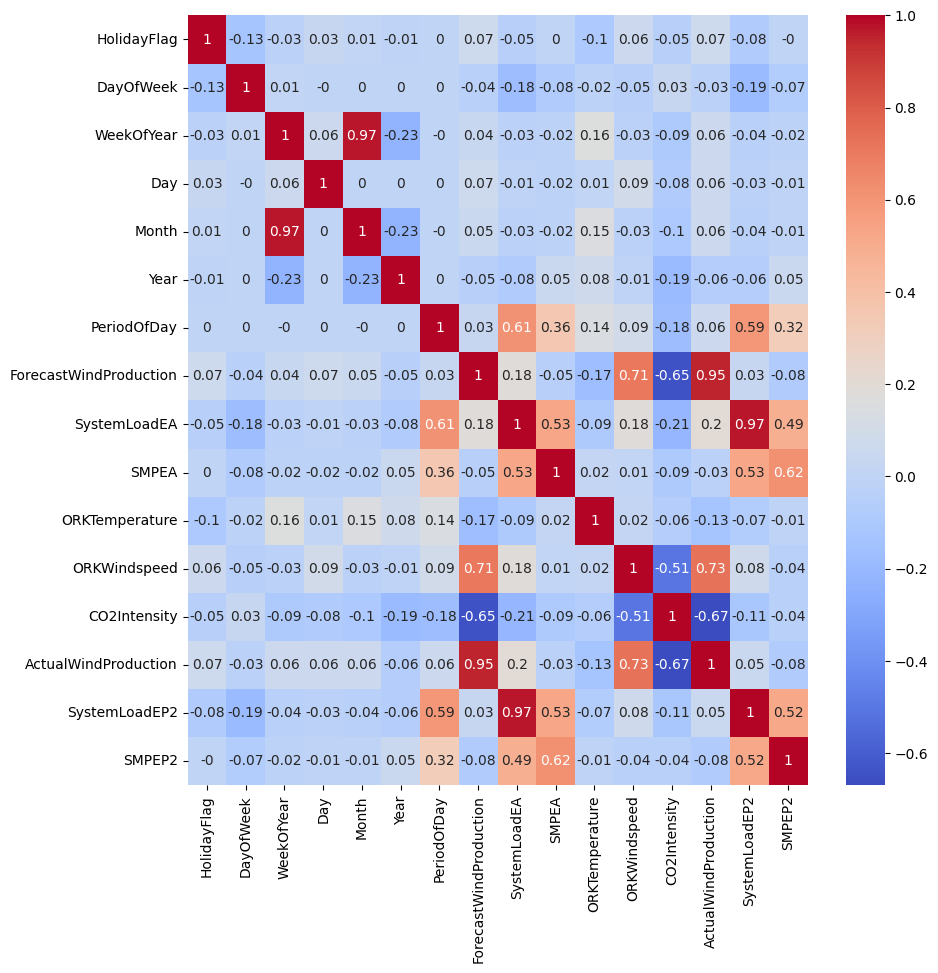

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
correlations = np.round(data.corr(method='pearson'),2)
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
figure = px.line(data, x="DateTime", 
                 y="SMPEP2", 
                 title='Actual Price of the Electricity Consumed')
figure.show()

In [ ]:
figure = px.line(data, x="DateTime", 
                 y="SystemLoadEP2", 
                 title='Actual National System Load')
figure.show()

In [ ]:
figure = px.line(data, x="DateTime", 
                 y="ActualWindProduction", 
                 title='Actual Wind Energy Production')
figure.show()

In [ ]:
figure = px.line(data, x="DateTime", 
                 y="ORKTemperature", 
                 title='Actual Temprature')
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="ORKTemperature",
                    y="SMPEP2", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Energy Price")
figure.show()

In [ ]:
data["DateTime"] = pd.to_datetime(data["DateTime"], format = '%d/%m/%Y %H:%M')

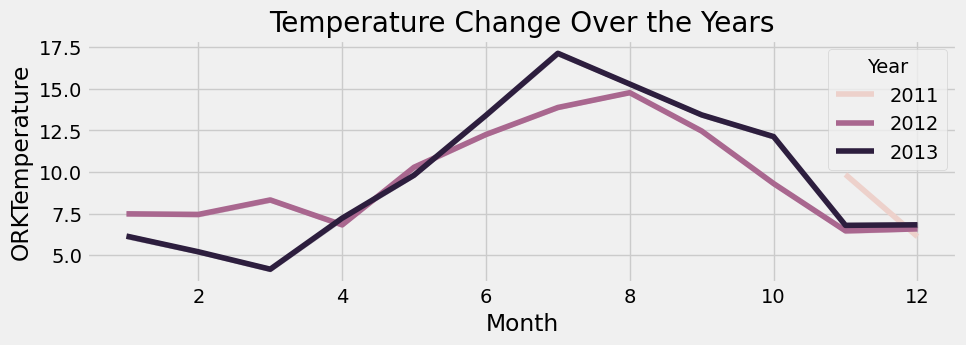

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 3))
plt.title("Temperature Change Over the Years")
sns.lineplot(data = data, x='Month', y='ORKTemperature', hue='Year')
plt.show()

In [ ]:
# The prophet model accepts time data named as “ds”, and labels as “y”.

forecast_data = data.rename(columns = {"DateTime": "ds", 
                                       "SMPEP2": "y"})


In [ ]:
forecast_data.head()

ds Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0 2011-11-01 00:00:00    None            0          1          44    1     11   
1 2011-11-01 00:30:00    None            0          1          44    1     11   
2 2011-11-01 01:00:00    None            0          1          44    1     11   
3 2011-11-01 01:30:00    None            0          1          44    1     11   
4 2011-11-01 02:00:00    None            0          1          44    1     11   

   Year  PeriodOfDay  ForecastWindProduction  SystemLoadEA  SMPEA  \
0  2011            0                  315.31       3388.77  49.26   
1  2011            1                  321.80       3196.66  49.26   
2  2011            2                  328.57       3060.71  49.10   
3  2011            3                  335.60       2945.56  48.04   
4  2011            4                  342.90       2849.34  33.75   

   ORKTemperature  ORKWindspeed  CO2Intensity  ActualWindProduction  \
0             6.0           9.3        600.71                 356.0   
1             6.0          11.1        605.42                 317.0   
2             5.0          11.1        589.97                 311.0   
3             6.0           9.3        585.94                 313.0   
4             6.0          11.1        571.52                 346.0   

   SystemLoadEP2      y  year  month  
0        3159.60  54.32  2011     11  
1        2973.01  54.23  2011     11  
2        2834.00  54.23  2011     11  
3        2725.99  53.47  2011     11  
4        2655.64  39.87  2011     11

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ppvyyxt/_upqpbs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ppvyyxt/l_bbj9j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61472', 'data', 'file=/tmp/tmp5ppvyyxt/_upqpbs6.json', 'init=/tmp/tmp5ppvyyxt/l_bbj9j3.json', 'output', 'file=/tmp/tmp5ppvyyxt/prophet_modeli350_lrb/prophet_model-20230412112857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecasts

ds
0     2011-11-01 00:00:00
1     2011-11-01 00:30:00
2     2011-11-01 01:00:00
3     2011-11-01 01:30:00
4     2011-11-01 02:00:00
...                   ...
37737 2014-02-25 23:30:00
37738 2014-02-26 23:30:00
37739 2014-02-27 23:30:00
37740 2014-02-28 23:30:00
37741 2014-03-01 23:30:00

[37742 rows x 1 columns]

In [ ]:
forecasts = model.make_future_dataframe(periods=60)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

Output hidden; open in https://colab.research.google.com to view.